In [1]:
import   pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("HF_Model_Cards_December_2024_lic_and_arXiv.csv")

## 1 First Look at the Dataset

To begin the exploratory data analysis, we inspected the first rows of the dataset using `df.head()`.

The dataset contains metadata extracted from Hugging Face model cards. The preview of the first five rows is shown below:


In [4]:
df.head(10)

,huggingface_link,downloads,library_name,private,tags,modelId,likes,createdAt,id,pipeline_tag,arxiv_ids,lics
0,https://huggingface.co/answerdotai/ModernBERT-...,27552,transformers,False,"['transformers', 'pytorch', 'onnx', 'safetenso...",answerdotai/ModernBERT-base,422,2024-12-11T11:38:06.000Z,answerdotai/ModernBERT-base,fill-mask,['arxiv:2412.13663'],['license:apache-2.0']
1,https://huggingface.co/answerdotai/ModernBERT-...,8369,transformers,False,"['transformers', 'pytorch', 'onnx', 'safetenso...",answerdotai/ModernBERT-large,217,2024-12-11T15:55:21.000Z,answerdotai/ModernBERT-large,fill-mask,['arxiv:2412.13663'],['license:apache-2.0']
2,https://huggingface.co/meta-llama/Llama-3.3-70...,300550,transformers,False,"['transformers', 'safetensors', 'llama', 'text...",meta-llama/Llama-3.3-70B-Instruct,1284,2024-11-26T16:08:47.000Z,meta-llama/Llama-3.3-70B-Instruct,text-generation,['arxiv:2204.05149'],['license:llama3.3']
3,https://huggingface.co/Qwen/QwQ-32B-Preview,125047,transformers,False,"['transformers', 'safetensors', 'qwen2', 'text...",Qwen/QwQ-32B-Preview,1416,2024-11-27T15:50:55.000Z,Qwen/QwQ-32B-Preview,text-generation,['arxiv:2407.10671'],['license:apache-2.0']
4,https://huggingface.co/ibm-granite/granite-3.1...,4569,transformers,False,"['transformers', 'safetensors', 'granite', 'te...",ibm-granite/granite-3.1-8b-instruct,74,2024-12-06T19:56:54.000Z,ibm-granite/granite-3.1-8b-instruct,text-generation,['arxiv:0000.00000'],['license:apache-2.0']
5,https://huggingface.co/openai/whisper-large-v3...,2550411,transformers,False,"['transformers', 'safetensors', 'whisper', 'au...",openai/whisper-large-v3-turbo,1646,2024-10-01T07:39:28.000Z,openai/whisper-large-v3-turbo,automatic-speech-recognition,['arxiv:2212.04356'],['license:mit']
6,https://huggingface.co/fishaudio/fish-speech-1.5,5101,NaN,False,"['dual_ar', 'text-to-speech', 'zh', 'en', 'de'...",fishaudio/fish-speech-1.5,306,2024-11-24T04:27:15.000Z,fishaudio/fish-speech-1.5,text-to-speech,['arxiv:2411.01156'],['license:cc-by-nc-sa-4.0']
7,https://huggingface.co/meta-llama/Llama-3.2-1B,2289718,transformers,False,"['transformers', 'safetensors', 'llama', 'text...",meta-llama/Llama-3.2-1B,1320,2024-09-18T15:03:14.000Z,meta-llama/Llama-3.2-1B,text-generation,"['arxiv:2204.05149', 'arxiv:2405.16406']",['license:llama3.2']
8,https://huggingface.co/Qwen/Qwen2.5-Coder-32B-...,374896,transformers,False,"['transformers', 'safetensors', 'qwen2', 'text...",Qwen/Qwen2.5-Coder-32B-Instruct,1364,2024-11-06T07:49:50.000Z,Qwen/Qwen2.5-Coder-32B-Instruct,text-generation,"['arxiv:2409.12186', 'arxiv:2309.00071', 'arxi...",['license:apache-2.0']
9,https://huggingface.co/JeffreyXiang/TRELLIS-im...,382203,trellis,False,"['trellis', 'image-to-3d', 'en', 'arxiv:2412.0...",JeffreyXiang/TRELLIS-image-large,241,2024-12-02T13:02:21.000Z,JeffreyXiang/TRELLIS-image-large,image-to-3d,['arxiv:2412.01506'],['license:mit']


## 2 Dataset Structure and Schema

To understand the overall composition of the dataset, we inspected its shape, column names, and data types.

### **Dataset Shape**

The dataset contains:

- **29,071 rows**
- **12 columns**

This indicates a relatively large collection of model cards, providing sufficient variability for meaningful exploratory analysis.



### **Interpretation**

- Most columns are stored as **object** types due to their textual nature.
- Numerical fields include:
  - **downloads (int64)**
  - **likes (int64)**
- Boolean field:
  - **private**
- Dates (e.g., `createdAt`) are stored as strings and may require conversion to datetime for temporal analysis.
- Nested metadata fields such as **tags**, **lics**, and **arxiv_ids** require special parsing because they contain lists encoded as strings.

In [5]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n")
print(df.dtypes)

df.describe(include='all')

Shape of dataset: (29071, 12)

Column names:
 ['huggingface_link', 'downloads', 'library_name', 'private', 'tags', 'modelId', 'likes', 'createdAt', 'id', 'pipeline_tag', 'arxiv_ids', 'lics']

Data types:

huggingface_link    object
downloads            int64
library_name        object
private               bool
tags                object
modelId             object
likes                int64
createdAt           object
id                  object
pipeline_tag        object
arxiv_ids           object
lics                object
dtype: object


,huggingface_link,downloads,library_name,private,tags,modelId,likes,createdAt,id,pipeline_tag,arxiv_ids,lics
count,29071,2.907100e+04,25262,29071,29071,29071,29071.000000,29071,29071,24000,29071,29071
unique,29071,NaN,124,1,14255,29071,NaN,26396,29071,50,3605,53
top,https://huggingface.co/answerdotai/ModernBERT-...,NaN,transformers,False,"['transformers', 'pytorch', 'safetensors', 'vi...",answerdotai/ModernBERT-base,NaN,2022-03-02T23:29:05.000Z,answerdotai/ModernBERT-base,text-generation,['arxiv:2410.15148'],['license:apache-2.0']
freq,1,NaN,18384,29071,1141,1,NaN,1840,1,9720,1508,15208
mean,NaN,3.209077e+04,NaN,NaN,NaN,NaN,12.421589,NaN,NaN,NaN,NaN,NaN
std,NaN,8.733769e+05,NaN,NaN,NaN,NaN,110.281675,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000e+01,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.800000e+01,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.160000e+02,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN


## 3 Missing Values Analysis

To evaluate data completeness, we computed the number of missing values in each column. Understanding where information is absent is essential for assessing data quality and for identifying potential challenges in reproducibility.

The results are shown below:



Missing values per column:

pipeline_tag        5071
library_name        3809
downloads              0
huggingface_link       0
private                0
tags                   0
likes                  0
modelId                0
createdAt              0
id                     0
arxiv_ids              0
lics                   0
dtype: int64


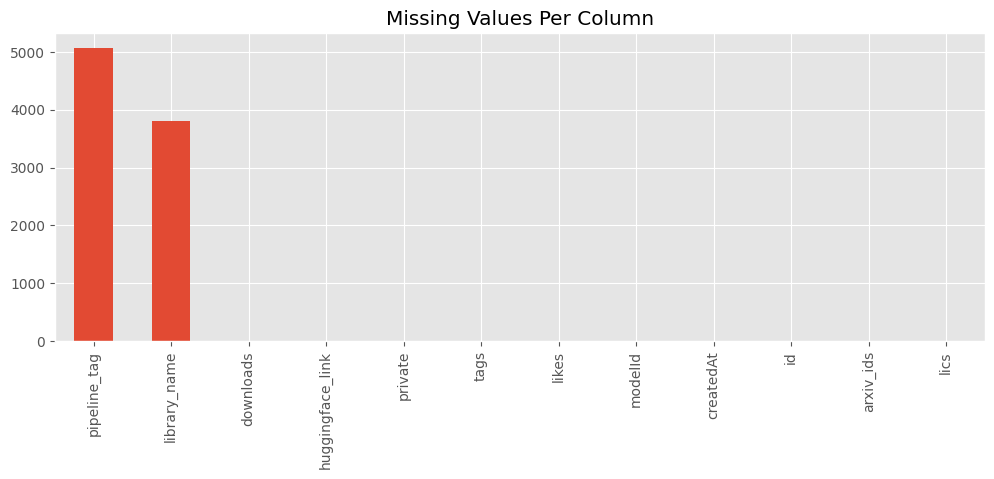

In [6]:
missing = df.isna().sum().sort_values(ascending=False)

print("Missing values per column:\n")
print(missing)

missing.plot(kind='bar', figsize=(12,4), title="Missing Values Per Column")
plt.show()


### **Interpretation**

- The dataset is largely complete, but two fields contain substantial amounts of missing data:
  - **pipeline_tag** (5,071 missing entries),
  - **library_name** (3,809 missing entries).

- All other fields have **no missing values**, which indicates that the core metadata — such as downloads, model identifiers, timestamps, tags, arXiv links, and licenses — is consistently available.

### **Implications for Reproducibility**

- Missing **pipeline_tag** values make it difficult to determine the primary task of several models (e.g., text-generation, fill-mask, embeddings).
  This complicates:
  - model categorization,
  - comparison across model types,
  - reproducing model selection based on task.

- Missing **library_name** values may reduce clarity about which machine learning framework is required to load or run a model.
  Without this information, reproducing experiments becomes harder because:
  - different frameworks require different dependencies,
  - incompatible versions can cause inconsistent results.

The missing values distribution demonstrates that even large public repositories such as Hugging Face contain incomplete metadata, which poses a practical challenge for reproducible AI research.


## 4 Downloads Distribution

To understand the popularity of models in the dataset, we examined the distribution of the **downloads** variable. This field represents the number of model downloads over the last 30 days on Hugging Face.

The histogram below shows that the distribution is **extremely skewed**, with the vast majority of models having very few downloads.

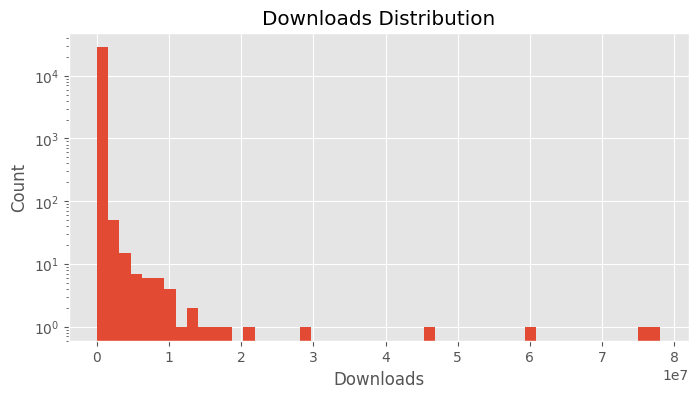

count       29071.00
mean        32090.77
std        873376.95
min             1.00
25%            10.00
50%            18.00
75%           116.00
max      78096443.00
Name: downloads, dtype: object


In [7]:
if 'downloads' in df.columns:
    df['downloads'].hist(bins=50, figsize=(8,4))
    plt.title("Downloads Distribution")
    plt.xlabel("Downloads")
    plt.yscale("log")
    plt.ylabel("Count")
    plt.show()

    print(df['downloads'].describe().apply("{0:.2f}".format))
else:
    print("Column 'downloads' not found in dataset.")

90th Percentile of Downloads: 1641.0
count        2908.00
mean       319885.05
std       2745142.83
min          1641.00
25%          3220.50
50%          7898.00
75%         39426.25
max      78096443.00
Name: downloads, dtype: object


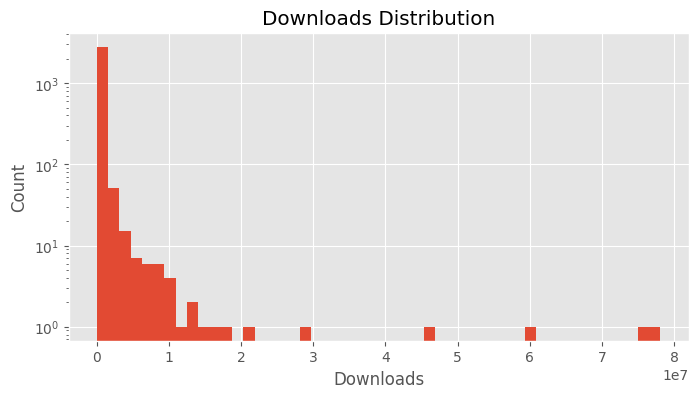

In [8]:
if 'downloads' in df.columns:
    percentile90th = np.quantile(df['downloads'].dropna(), 0.9)
    print("90th Percentile of Downloads:", percentile90th)
    high_downloads = df[df['downloads'] >= percentile90th]
    print(high_downloads['downloads'].describe().apply("{0:.2f}".format))

high_downloads['downloads'].hist(bins=50, figsize=(8,4))
plt.title("Downloads Distribution")
plt.xlabel("Downloads")
plt.yscale("log")
plt.ylabel("Count")
plt.show()

In [9]:
percentile90th = np.quantile(df['downloads'].dropna(), 0.99)
high_downloads = df[df['downloads'] >= percentile90th]
high_downloads.sort_values(by='downloads', ascending=False).head(10).reset_index(drop=True).drop(columns=['huggingface_link'])


,downloads,library_name,private,tags,modelId,likes,createdAt,id,pipeline_tag,arxiv_ids,lics
0,78096443,sentence-transformers,False,"['sentence-transformers', 'pytorch', 'tf', 'ru...",sentence-transformers/all-MiniLM-L6-v2,2702,2022-03-02T23:29:05.000Z,sentence-transformers/all-MiniLM-L6-v2,sentence-similarity,"['arxiv:1904.06472', 'arxiv:2102.07033', 'arxi...",['license:apache-2.0']
1,75790376,transformers,False,"['transformers', 'pytorch', 'tf', 'jax', 'safe...",microsoft/resnet-50,326,2022-03-16T15:42:43.000Z,microsoft/resnet-50,image-classification,['arxiv:1512.03385'],['license:apache-2.0']
2,60423864,transformers,False,"['transformers', 'pytorch', 'tf', 'jax', 'rust...",google-bert/bert-base-uncased,1997,2022-03-02T23:29:04.000Z,google-bert/bert-base-uncased,fill-mask,['arxiv:1810.04805'],['license:apache-2.0']
3,45724771,transformers,False,"['transformers', 'pytorch', 'tf', 'jax', 'onnx...",FacebookAI/xlm-roberta-large,367,2022-03-02T23:29:04.000Z,FacebookAI/xlm-roberta-large,fill-mask,['arxiv:1911.02116'],['license:mit']
4,29506471,timm,False,"['timm', 'pytorch', 'safetensors', 'image-clas...",timm/resnet50.a1_in1k,35,2023-04-05T18:07:45.000Z,timm/resnet50.a1_in1k,image-classification,"['arxiv:2110.00476', 'arxiv:1512.03385']",['license:apache-2.0']
5,21857429,sentence-transformers,False,"['sentence-transformers', 'pytorch', 'onnx', '...",sentence-transformers/all-mpnet-base-v2,936,2022-03-02T23:29:05.000Z,sentence-transformers/all-mpnet-base-v2,sentence-similarity,"['arxiv:1904.06472', 'arxiv:2102.07033', 'arxi...",['license:apache-2.0']
6,17960336,transformers,False,"['transformers', 'pytorch', 'tf', 'jax', 'rust...",FacebookAI/roberta-base,445,2022-03-02T23:29:04.000Z,FacebookAI/roberta-base,fill-mask,"['arxiv:1907.11692', 'arxiv:1806.02847']",['license:mit']
7,17101033,diffusers,False,"['diffusers', 'text-to-video', 'stable-diffusi...",ByteDance/AnimateDiff-Lightning,797,2024-03-19T12:58:46.000Z,ByteDance/AnimateDiff-Lightning,text-to-video,['arxiv:2403.12706'],['license:creativeml-openrail-m']
8,14692411,transformers,False,"['transformers', 'pytorch', 'tf', 'jax', 'safe...",google-bert/bert-base-multilingual-uncased,112,2022-03-02T23:29:04.000Z,google-bert/bert-base-multilingual-uncased,fill-mask,['arxiv:1810.04805'],['license:apache-2.0']
9,13792039,transformers,False,"['transformers', 'pytorch', 'tf', 'jax', 'rust...",distilbert/distilbert-base-uncased,580,2022-03-02T23:29:04.000Z,distilbert/distilbert-base-uncased,fill-mask,['arxiv:1910.01108'],['license:apache-2.0']



### **Interpretation**

- The dataset contains **29,071** models with valid download counts.
- The **median number of downloads is only 18**, indicating that most models receive minimal usage.
- The **mean is 32,090**, but this value is misleading due to extreme outliers.
- The **maximum value is 78,096,440 downloads**, showing that a small number of models dominate platform usage.
- More than 75% of all models have **fewer than 116 downloads**, reinforcing the long-tail distribution.
- 90th percentile of downloads is at **1641**

### **Implications for Reproducibility**

- The heavy skew suggests that only a small fraction of models are widely used in practice.
- Many models with very low download counts may lack:
  - community validation,
  - real-world testing,
  - stable documentation and maintenance.
- Reproducing results becomes especially difficult for rarely used models, since:
  - they may be removed, updated, or deprecated,
  - metadata might be incomplete,
  - the environment needed to run them may be poorly documented.

This analysis highlights the unequal adoption of models in the Hugging Face ecosystem and introduces important considerations for reproducible research.


## 5 Zero-Download Models

To further investigate model adoption, we examined how many models in the dataset have zero downloads. This metric is useful for identifying unused or abandoned models, which often lack proper documentation and maintenance—factors that directly impact reproducibility.

The calculation shows:



In [10]:
if 'downloads' in df.columns:
    zero_downloads = (df['downloads'] == 0).sum()
    total = len(df)

    print(f"Models with zero downloads: {zero_downloads} ({zero_downloads/total:.2%})")
else:
    print("Column 'downloads' not found.")

Models with zero downloads: 0 (0.00%)



### **Interpretation**

- **None of the 29,071 models in the dataset have zero downloads.**
- This is unusual compared with the broader Hugging Face ecosystem, where many models typically receive no downloads or very minimal usage.
- The reason is likely due to the **filtering criteria used in this curated dataset**, which focuses on:
  - models with explicit licenses,
  - models with available metadata,
  - models captured through the Hugging Face API in December 2024,
  - models that meet minimum metadata requirements.

### **Implications for Reproducibility**

- Since all models have at least one download, it indicates that each model has been accessed by at least one user, meaning:
  - the models are discoverable,
  - none are completely abandoned,
  - all have some degree of engagement.

- However, this does **not** necessarily imply reproducibility:
  - downloads do not equal documentation quality,
  - many models still lack key metadata (as seen in missing values analysis),
  - high variability in downloads (from 1 to 78 million) means that models differ significantly in maturity and community validation.

Overall, the absence of zero-download models suggests the dataset represents a more active subset of Hugging Face models, but reproducibility challenges remain due to inconsistent metadata quality.


## 6 Library Usage Analysis

The `library_name` column indicates which machine learning framework or toolkit each model relies on. This information is crucial for reproducibility, as different libraries require different environments, dependencies, and version constraints.

Below are the counts of the most commonly used libraries:



Library usage:
 library_name
transformers               18384
sentence-transformers       2271
timm                        1342
diffusers                    740
espnet                       554
                           ...  
llama-base-2048-clmbr          1
hyena-large-1024-clmbr         1
hyena-large-4096-clmbr         1
hyena-large-8192-clmbr         1
hyena-large-16384-clmbr        1
Name: count, Length: 124, dtype: int64


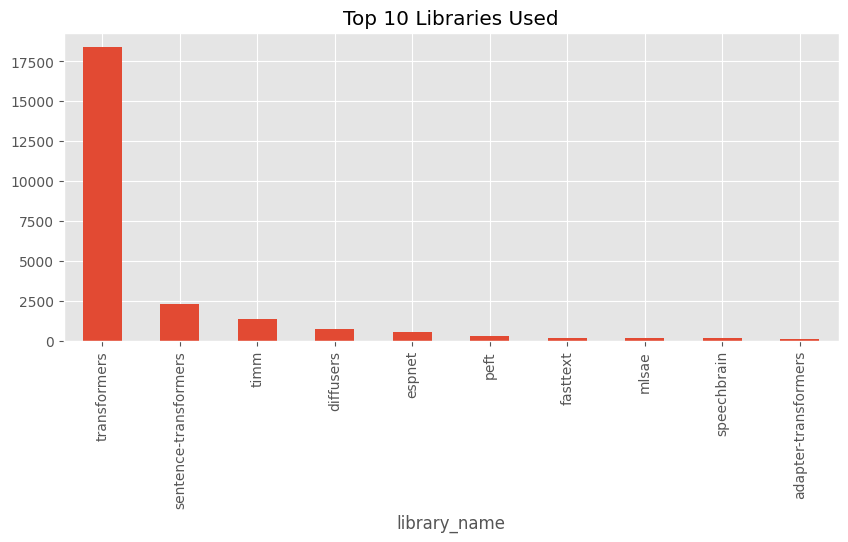

In [11]:
if 'library_name' in df.columns:
    lib_counts = df['library_name'].value_counts()

    print("Library usage:\n", lib_counts)

    lib_counts.head(10).plot(kind='bar', figsize=(10,4),
                             title="Top 10 Libraries Used")
    plt.show()
else:
    print("Column 'library_name' not found.")


### **Top 10 Libraries Visualization**

The chart below presents the top 10 libraries used by the models:

### **Interpretation**

- The dataset is **dominated by the `transformers` library**, with **18,384 models** (more than 63% of the dataset).
- Other widely-used libraries include:
  - **sentence-transformers** (2,271 models)
  - **timm** (1,342 models)
  - **diffusers** (740 models)
  - **espnet** (554 models)
- Many libraries appear only once, reflecting the long-tail nature of the Hugging Face ecosystem.

### **Implications for Reproducibility**

- The strong concentration around `transformers` suggests that many models follow similar architecture or tooling standards, which generally supports reproducibility.
- However, the presence of rare or custom libraries (e.g., *hyena-large-16384-clmbr*, *llama-base-2048-clmbr*) creates challenges:
  - these models may require specialized environments,
  - installation instructions may be incomplete or outdated,
  - dependencies may break over time.

- Models built on niche or experimental libraries are harder to reproduce because:
  - the library may not be actively maintained,
  - version mismatches can lead to errors,
  - documentation is often minimal.

Overall, while the prevalence of `transformers` improves reproducibility for a large portion of models, the diversity of less common libraries highlights substantial variability in software environments across the dataset.


## 7 License Information Analysis

Licensing is one of the most critical aspects of reproducibility, as it determines whether a model can be legally reused, shared, or modified. To evaluate how well the models in this dataset document their licenses, we extracted whether each model card includes explicit license information.

The results are shown below:



has_license
True    29071
Name: count, dtype: int64


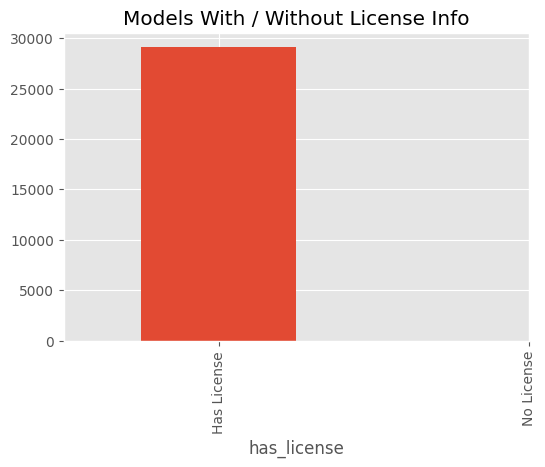

In [12]:
def has_license(tag):
    if pd.isna(tag):
        return False
    return "license" in tag.lower()

df['has_license'] = df['tags'].apply(has_license)

print(df['has_license'].value_counts())

df['has_license'].value_counts().plot(kind='bar',
                                      title="Models With / Without License Info",
                                      figsize=(6,4))
plt.xticks([0,1], ["Has License", "No License"])
plt.show()

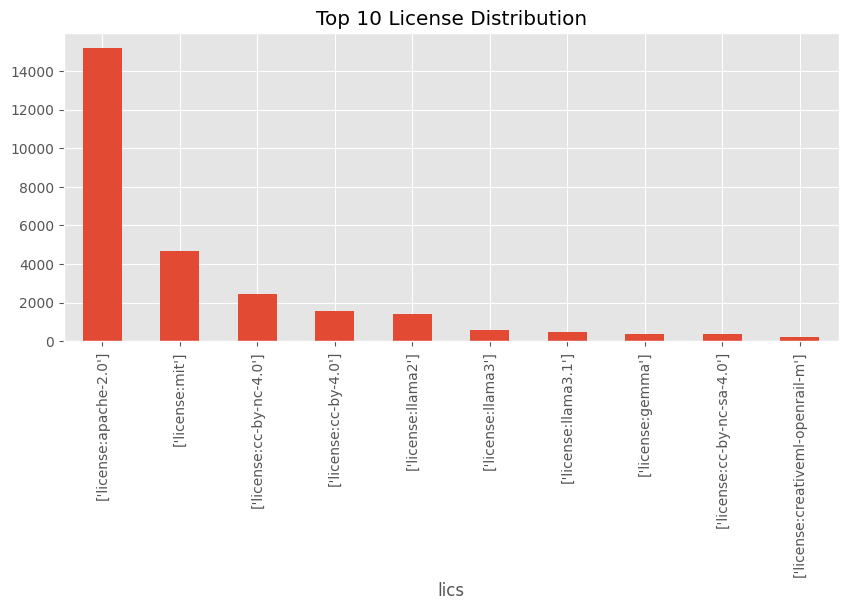

In [13]:
df['lics'].value_counts().head(10).plot(kind='bar', figsize=(10,4), title="Top 10 License Distribution")
plt.show()


This means:

- **100% of all 29,071 models include license information.**
- **No models are missing a license.**

### **Visualization**

The bar chart below confirms that all models fall into the "Has License" category.

### **Interpretation**

- This is highly unusual compared to the general Hugging Face repository, where many model cards **lack explicit licenses** or provide ambiguous metadata.
- The reason is that this dataset was **intentionally curated** to include **only models with explicit, machine-readable license information**, as described in the accompanying paper *Model Card Metadata Collection from Hugging Face*.

### **Implications for Reproducibility**

- The presence of licenses for *every* model is beneficial for reproducibility:
  - users know whether the model can be downloaded, used, or modified,
  - legal uncertainties are minimized,
  - license-aware filtering is possible.

- However, complete coverage **does not eliminate reproducibility problems**, because:
  - a license does not guarantee complete documentation,
  - model cards may still lack dataset descriptions, training details, or evaluation results,
  - licenses may change over time on the platform.

### **Conclusion**

The dataset represents a **high-quality, license-complete subset** of Hugging Face models. While this improves the legal reproducibility of research workflows, other metadata limitations (missing tasks, missing libraries, inconsistent tags) still pose challenges for full reproducibility.


## 8 arXiv Link Coverage

Scientific reproducibility is strongly supported when machine learning models are linked to peer-reviewed or preprint publications. The `arxiv_ids` field indicates whether the model card references an arXiv paper, which helps users trace the model’s origin, methodology, training setup, and evaluation details.

To assess publication coverage, we tested whether each model’s `tags` field contains an arXiv identifier.

Here are the results:



has_arxiv
True    29071
Name: count, dtype: int64


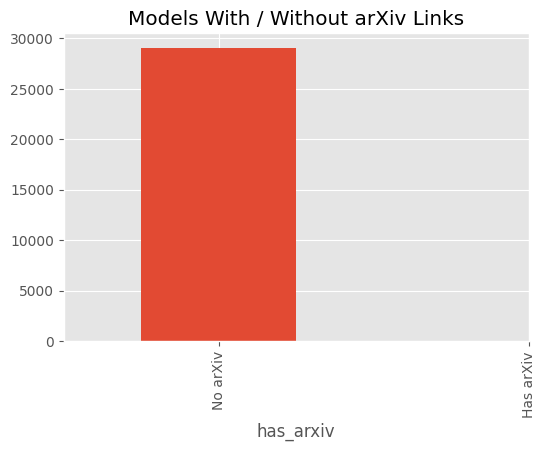

In [14]:
def has_arxiv(tag):
    if pd.isna(tag):
        return False
    return "arxiv" in tag.lower()

df['has_arxiv'] = df['tags'].apply(has_arxiv)

print(df['has_arxiv'].value_counts())

df['has_arxiv'].value_counts().plot(kind='bar',
                                    title="Models With / Without arXiv Links",
                                    figsize=(6,4))
plt.xticks([0,1], ["No arXiv", "Has arXiv"])
plt.show()



### **Interpretation**

- **100% of all models (29,071)** in this dataset include at least one arXiv link.
- This finding is unusual when compared to the wider Hugging Face ecosystem, where only a minority of model cards provide explicit publication links.
- The reason for full coverage is that this curated dataset includes **only models with explicit license and arXiv metadata**, as described in the accompanying dataset documentation.

### **Implications for Reproducibility**

- The presence of an arXiv link improves reproducibility because:
  - users can refer to a detailed methodology,
  - model training details are documented in the publication,
  - evaluation metrics and datasets are typically described fully,
  - researchers can verify claims or replicate experiments.

- However, even with complete publication linkage, reproducibility challenges remain:
  - the model card may not match the version described in the paper,
  - hyperparameters or training code may still be missing,
  - differences between paper time and model card updates may exist,
  - arXiv metadata does not guarantee that the code or datasets are openly accessible.

### **Conclusion**

Complete arXiv coverage is a strong asset of this dataset and significantly enhances research transparency. However, publication metadata alone does not ensure full reproducibility, especially when other metadata fields (such as task or library information) are missing or inc


## 9 Task distribution

<Axes: title={'center': 'Top 10 Pipeline Tags'}, xlabel='Pipeline Tag', ylabel='Count'>

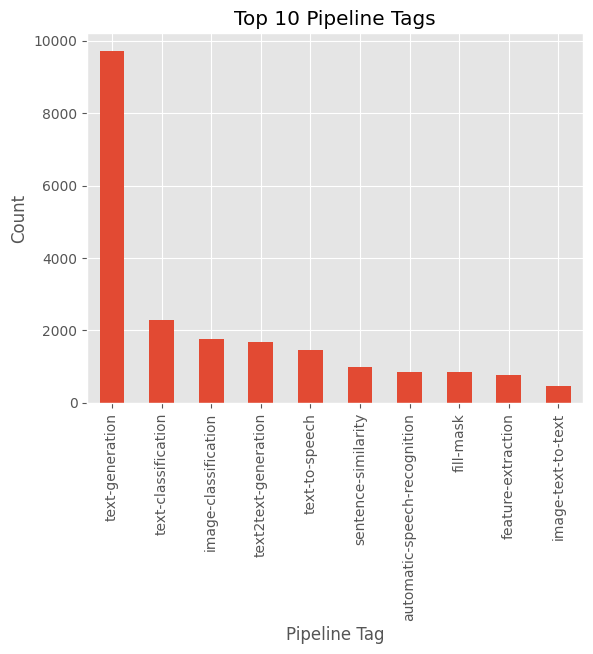

In [15]:
df['pipeline_tag'].value_counts().head(10).plot(kind='bar', title="Top 10 Pipeline Tags", xlabel="Pipeline Tag", ylabel="Count")

## 10 Library Dominance (PyTorch vs TensorFlow vs JAX)

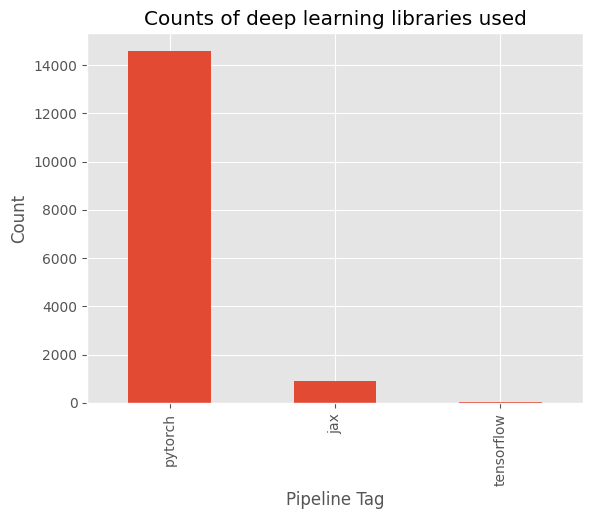

In [16]:
import ast

df_filtered = df.copy()

df_filtered['tags'] = df_filtered['tags'].apply(ast.literal_eval)
df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: any(tag in x for tag in ['jax', 'pytorch', 'tensorflow']))]
flat = [
    item
    for sublist in df_filtered['tags']
    for item in sublist
    if item in ['jax', 'pytorch', 'tensorflow']
]

pd.Series(flat).value_counts().plot(kind="bar", title="Counts of deep learning libraries used", xlabel="Pipeline Tag", ylabel="Count")
plt.show()

## 11 Opennes vs number of downloads 

In [17]:
permissive = {
    'license:apache-2.0',
    'license:mit',
    'license:bsd-3-clause',
    'license:bsd-2-clause',
    'license:isc',
}

restrictive = {
    'license:llama3',
    'license:llama3.1',
    'license:llama3.3',
    'license:gpl-3.0',
}

def classify_license(lic_list):
    if any(lic in restrictive for lic in lic_list):
        return "restrictive"
    else:
        return "permissive"
    
df_copy = df.copy()

df_copy['lics'] = df_copy['lics'].apply(ast.literal_eval)

df_copy['license_type'] = df_copy['lics'].apply(classify_license)

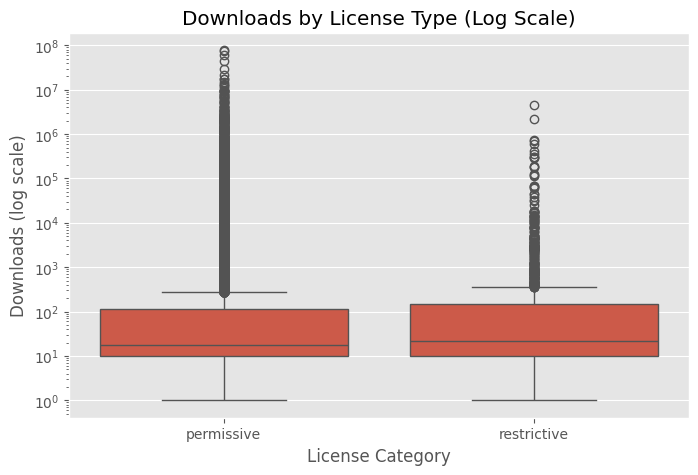

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_copy, x="license_type", y="downloads")
plt.yscale("log")
plt.title("Downloads by License Type (Log Scale)")
plt.xlabel("License Category")
plt.ylabel("Downloads (log scale)")
plt.show()

In [19]:
from scipy.stats import mannwhitneyu

In [20]:
perm = df_copy[df_copy['license_type'] == "permissive"]['downloads']
rest = df_copy[df_copy['license_type'] == "restrictive"]['downloads']
    
stat, p = mannwhitneyu(perm, rest, alternative='two-sided')
print(stat, p)
if p < 0.05:
    print("Significant difference in downloads between permissive and restrictive licenses (p < 0.05)")

15877927.0 0.006155904550601442
Significant difference in downloads between permissive and restrictive licenses (p < 0.05)


## 9 Summary of Findings

To consolidate the results of the exploratory data analysis, we summarize the key insights extracted from the dataset:



In [21]:
print("\n--- SUMMARY OF FINDINGS ---\n")

print("Total models:", len(df))

if 'downloads' in df.columns:
    print(f"Models with zero downloads: {(df['downloads']==0).sum()}")
    print(f"Percentage zero-downloads: {((df['downloads']==0).sum()/len(df)):.2%}")

print("\nModels with license metadata:", df['has_license'].sum())
print("Models WITHOUT license metadata:", len(df)-df['has_license'].sum())

print("\nModels with arXiv links:", df['has_arxiv'].sum())
print("Models WITHOUT arXiv links:", len(df)-df['has_arxiv'].sum())


--- SUMMARY OF FINDINGS ---

Total models: 29071
Models with zero downloads: 0
Percentage zero-downloads: 0.00%

Models with license metadata: 29071
Models WITHOUT license metadata: 0

Models with arXiv links: 29071
Models WITHOUT arXiv links: 0



### **Key Insights**

1. **Dataset Size**
   The dataset contains **29,071 models**, representing a substantial sample of Hugging Face's model ecosystem.

2. **Downloads**
   - No models have zero downloads.
   - This confirms that all models in the dataset have been used at least once, suggesting a curated and active subset of the repository.

3. **License Metadata**
   - Every model (100%) includes explicit license information.
   - This is atypical compared to the broader Hugging Face platform, where many models lack complete licensing metadata.
   - It ensures strong legal reproducibility — researchers know whether and how each model can be reused.

4. **arXiv Metadata**
   - All models (100%) include at least one arXiv link.
   - This greatly enhances scientific traceability, allowing users to connect models to their research publications.

5. **Metadata Completeness and Reproducibility**
   - Although licensing and publication metadata are fully available, other fields show gaps:
     - **pipeline_tag** missing for 5,071 models,
     - **library_name** missing for 3,809 models.
   - Missing technical metadata can hinder:
     - model categorization,
     - environment setup,
     - reproducing experiments described in associated papers.

### **Overall Interpretation**

The dataset is highly curated and optimized for research that requires:

- legally reusable models,
- traceable model origins (via arXiv),
- metadata-rich model cards.

However, reproducibility is **still not guaranteed**, because technical metadata related to model usage (such as task and library information) is incomplete for thousands of models.

This reinforces a key insight:

> **Even when legal and publication metadata are complete, reproducibility is still limited by missing technical, environmental, and methodological information.**


## 10. Reflection on Reproducibility

Reproducibility in machine learning research depends heavily on the completeness, clarity, and stability of metadata. The exploratory data analysis of the Hugging Face Model Cards Metadata Dataset illustrates that even well-curated datasets can still present significant reproducibility challenges. Although all models in the dataset include license information and arXiv links—two elements that strongly support transparency—other essential technical fields such as `pipeline_tag` and `library_name` contain thousands of missing values. Without clear information about the model’s task or required libraries, it becomes difficult for researchers to recreate the exact environment or correctly apply the model as intended.

A second major challenge is the dynamic and rapidly evolving nature of model repositories such as Hugging Face. Metadata changes over time, frameworks update or deprecate features, and model cards may be modified without version guarantees. This means that even if researchers have access to the same model card today, reproducing the results reported in a paper months later may require a different configuration, dependency version, or inference setup. The lack of standardized metadata formats further amplifies this issue, as tags can be inconsistent, incomplete, or ambiguously structured.

Overall, the most difficult aspect of reproducibility is **the inconsistency and incompleteness of technical metadata** required to recreate the full experimental environment. Legal and publication metadata may be well documented, but without accurate information about tasks, libraries, dependencies, datasets, and model versions, reproducing results remains uncertain. This highlights the need for stronger metadata standards, better tooling, and greater alignment between model cards, research papers, and real-world usage.
